# AUTOENCODERS FOR SYSTEMS BIOLOGY

The evaluation encompasses
* **Function recovery**. Can the autoencoder accurately recover time courses from reaction networks.
* **Insightful interpretation**. Does the autoencoder produce a low dimension representation that provides useful insights.

The initial focus is on function recovery. To gain insight into the effectiveness of autoencoders for this task, we start by considering synthetic time courses to investigate the ability of autoencoderes to recover functions similar to those used in rate laws of biological systems.

# Preliminaries

In [1]:
from autoencodersb import constants as cn
from autoencodersb.data_generator import DataGenerator
from autoencodersb.dataset_csv import DatasetCSV
from autoencodersb.polynomial_collection import PolynomialCollection
from autoencodersb.model_runner_pca import ModelRunnerPCA
from autoencodersb.model_runner_nn import ModelRunnerNN
from autoencodersb.autoencoder import Autoencoder
from autoencodersb.sequence import Sequence
from autoencodersb.model_runner_pca import ModelRunnerPCA
from autoencodersb.autoencoder import Autoencoder  # type: ignore
from autoencodersb.autoencoder_umap import AutoencoderUMAP # type: ignore
from autoencodersb.model_runner_umap import ModelRunnerUMAP # type: ignore
from autoencodersb.model_runner_pca import ModelRunnerPCA # type: ignore
import autoencodersb.utils as utils

import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import pandas as pd
import tellurium as te
import torch
from typing import Optional
import umap

/Users/jlheller/home/Technical/repos/autoencodersb/asb/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
NUM_EPOCH = 1000
SCHOKKER_MODEL_NUM = 895

In [19]:
TWENTY_STEP_MODEL = """
// Twenty Step Mass-Action Linear Chain

J1: $Xo -> S1; k10*Xo - k11*S1;
J2: S1 -> S2; k20*S1 - k21*S2;
J3: S2 -> S3; k30*S2 - k31*S3;
J4: S3 -> S4; k40*S3 - k41*S4;
J5: S4 -> S5; k50*S4 - k51*S5;
J6: S5 -> S6; k60*S5 - k61*S6;
J7: S6 -> S7; k70*S6 - k71*S7;
J8: S7 -> S8; k80*S7 - k81*S8;
J9: S8 -> S9; k90*S8 - k91*S9;
J10: S9 -> S10; k100*S9 - k101*S10;
J11: S10 -> S11; k110*S10 - k111*S11;
J12: S11 -> S12; k120*S11 - k121*S12;
J13: S12 -> S13; k130*S12 - k131*S13;
J14: S13 -> S14; k140*S13 - k141*S14;
J15: S14 -> S15; k150*S14 - k151*S15;
J16: S15 -> S16; k160*S15 - k161*S16;
J17: S16 -> S17; k170*S16 - k171*S17;
J18: S17 -> S18; k180*S17 - k181*S18;
J19: S18 -> S19; k190*S18 - k191*S19;
J20: S19 -> $X1; k200*S19 - k201*X1;

k10 = 4.32;  k11 = 0.36
k20 = 0.37;  k21 = 0.46
k30 = 5.01;  k31 = 0.86
k40 = 2.22;  k41 = 0.85
k50 = 1.29;  k51 = 0.83
k60 = 2.25;  k61 = 0.37
k70 = 0.9;  k71 = 0.25
k80 = 0.28;  k81 = 0.75
k90 = 2.81;  k91 = 0.41
k100 = 2.30;  k101 = 0.05
k110 = 0.50;  k111 = 0.17
k120 = 0.90;  k121 = 0.70
k130 = 0.98;  k131 = 0.46
k140 = 4.22;  k141 = 0.75
k150 = 0.71;  k151 = 0.44
k160 = 1.33;  k161 = 0.11
k170 = 0.33;  k171 = 0.21
k180 = 2.21;  k181 = 0.67
k190 = 3.84;  k191 = 0.45
k200 = 4.19;  k201 = 0.24

Xo = 10.00
X1 = 0

S1 = 0; S2 = 0; S3 = 0; S4 = 0;
S5 = 0; S6 = 0; S7 = 0; S8 = 0;
S9 = 0; S10 = 0; S11 = 0; S12 = 0;
S13 = 0; S14 = 0; S15 = 0; S16 = 0;
S17 = 0; S18 = 0; S19 = 0;
"""

# PCA

## Wolf Model

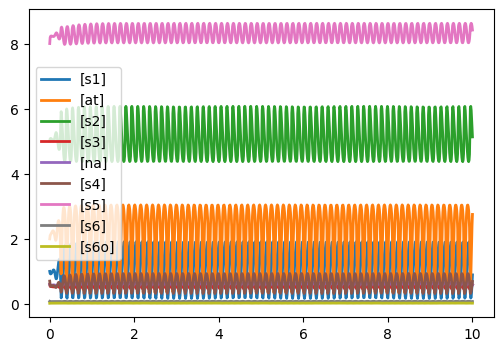

In [3]:
WOLF_URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL3352181362/3/BIOMD0000000206_url.xml"
rr = te.loadSBMLModel(utils.getLocalURL(WOLF_URL))
WOLF_ARR = rr.simulate(0, 10, 1000)
rr.plot()
columns = [c[1:-1] if c != 'time' else c for c in WOLF_ARR.colnames]
WOLF_DF = pd.DataFrame(WOLF_ARR, columns=columns)
WOLF_DL = DataLoader(DatasetCSV(WOLF_DF), batch_size=int(0.1*len(WOLF_DF)))

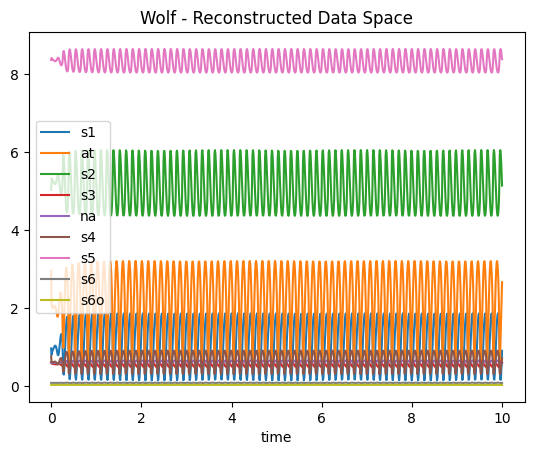

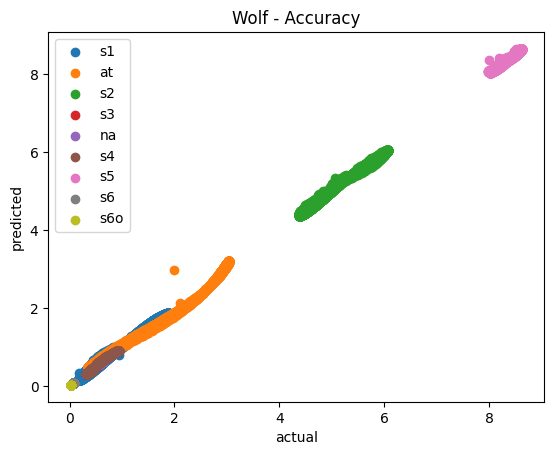

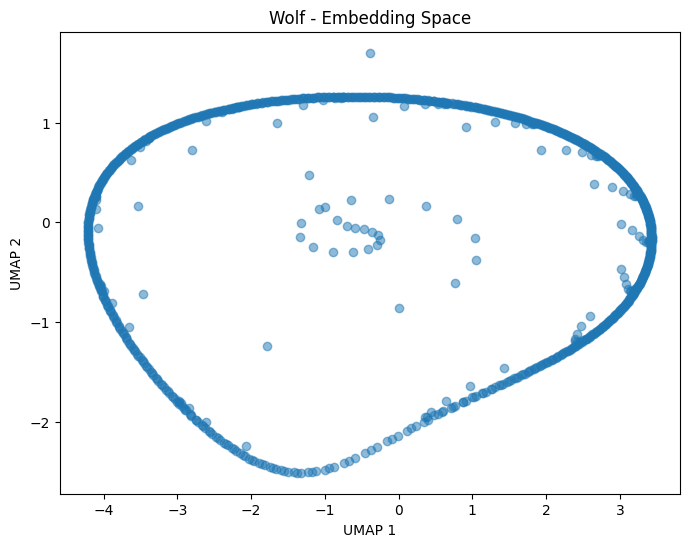

In [4]:
runner = ModelRunnerPCA.makeFromSBML(utils.getLocalURL(url=WOLF_URL), num_point=1000, num_epoch=500)
_ = runner.plotSimulationFit(model_ref="Wolf", is_plot_original=False)

## Schokker

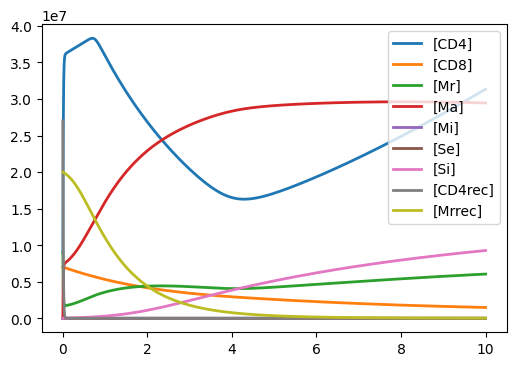

In [25]:
SCHOKKER_MODEL_NUM = 895
rr = te.loadSBMLModel(utils.getLocalURL(model_num=SCHOKKER_MODEL_NUM))
rr.simulate(0, 10, 1000)
rr.plot()

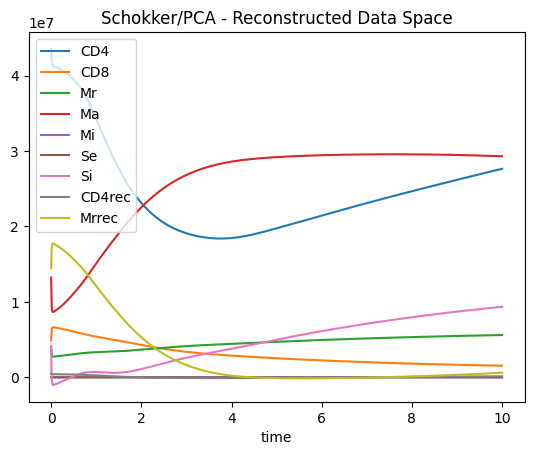

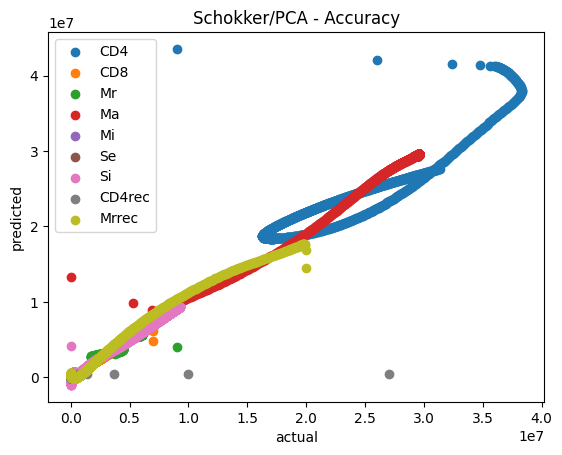

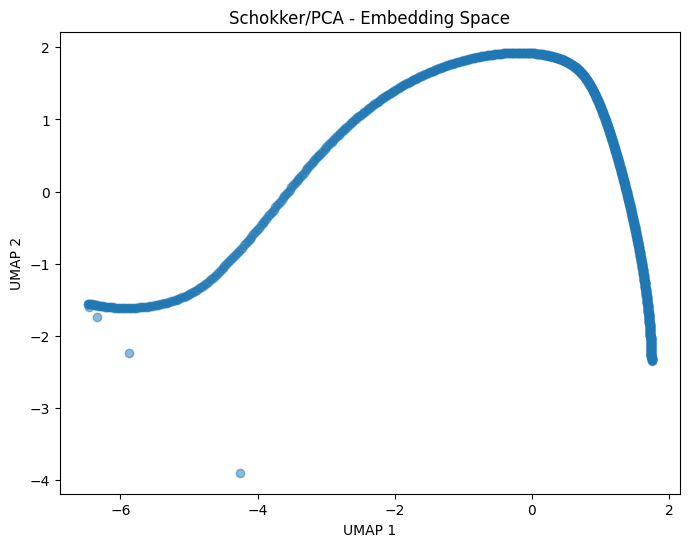

In [6]:
runner = ModelRunnerPCA.makeFromSBML(utils.getLocalURL(model_num=SCHOKKER_MODEL_NUM), num_point=1000,
                num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Schokker/PCA", is_plot_original=False)

## Twenty Steps

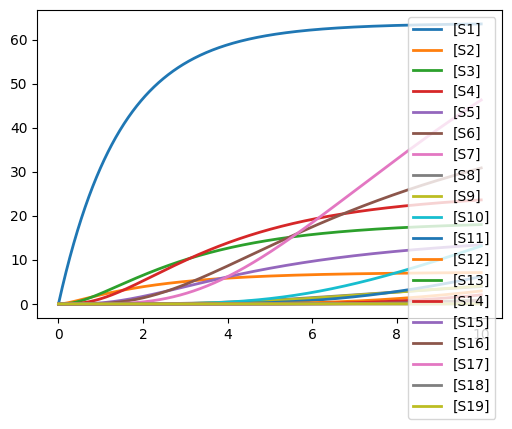

In [26]:
rr = te.loada(TWENTY_STEP_MODEL)
rr.simulate(0, 10, 1000)
rr.plot()

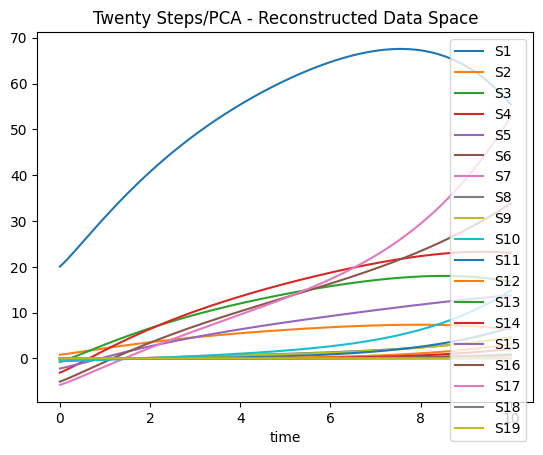

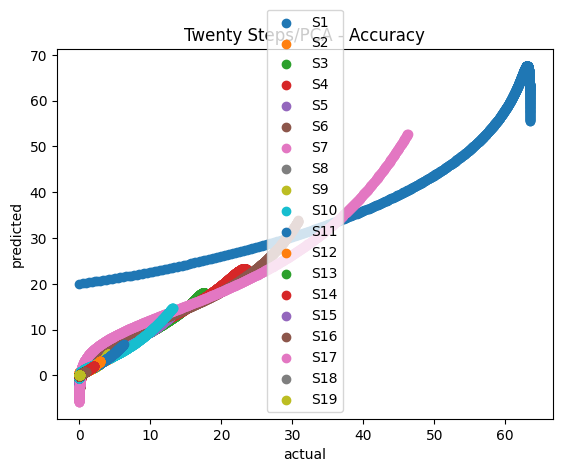

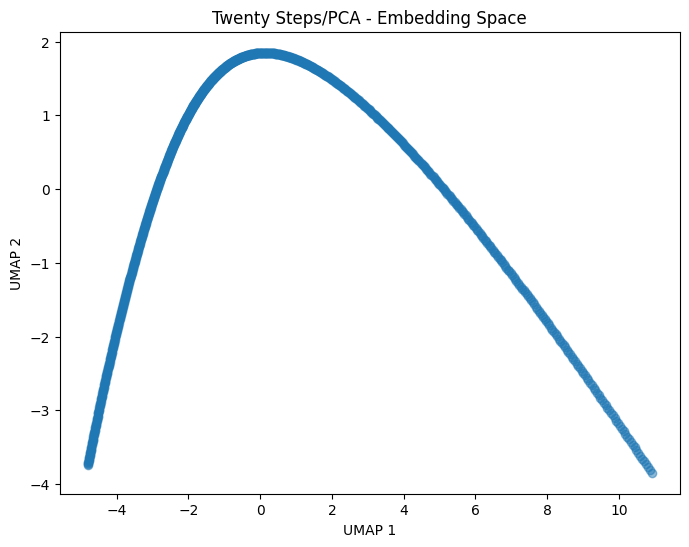

In [21]:
runner = ModelRunnerPCA.makeFromSBML(TWENTY_STEP_MODEL, num_point=1000,
                num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Twenty Steps/PCA", is_plot_original=False)

# Autoencoders

## Wolf

epochs (rmse=0.2810): 100%|█████████████████| 1000/1000 [05:10<00:00,  3.22it/s]


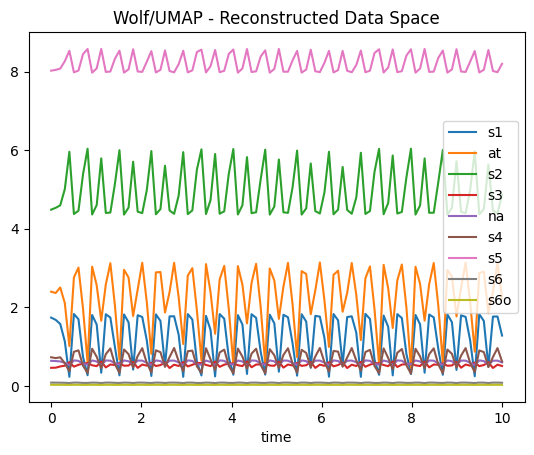

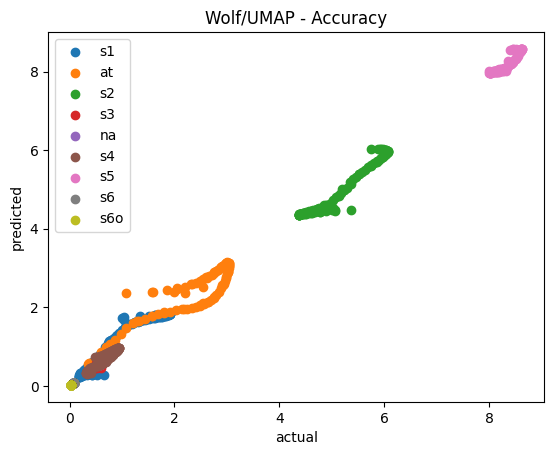

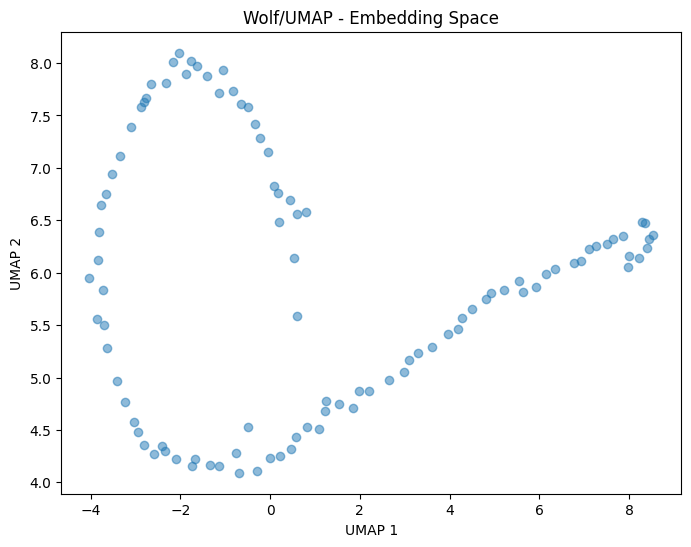

In [24]:
runner = ModelRunnerUMAP.makeFromSBML(utils.getLocalURL(url=WOLF_URL), num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Wolf/UMAP")

epochs (accuracy/loss=0.48/0.1887): 100%|███| 1000/1000 [09:10<00:00,  1.82it/s]


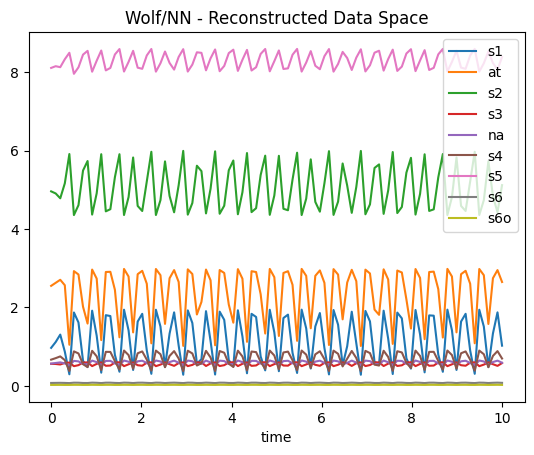

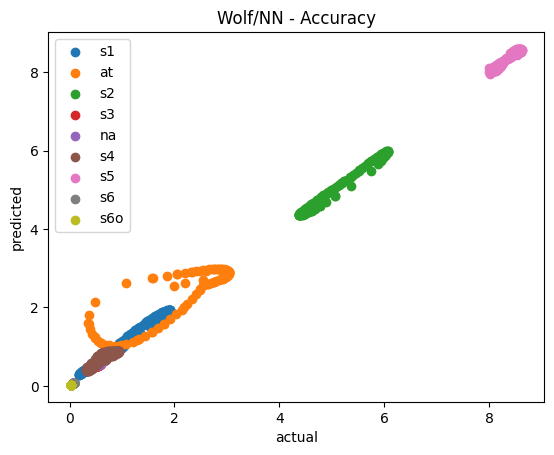

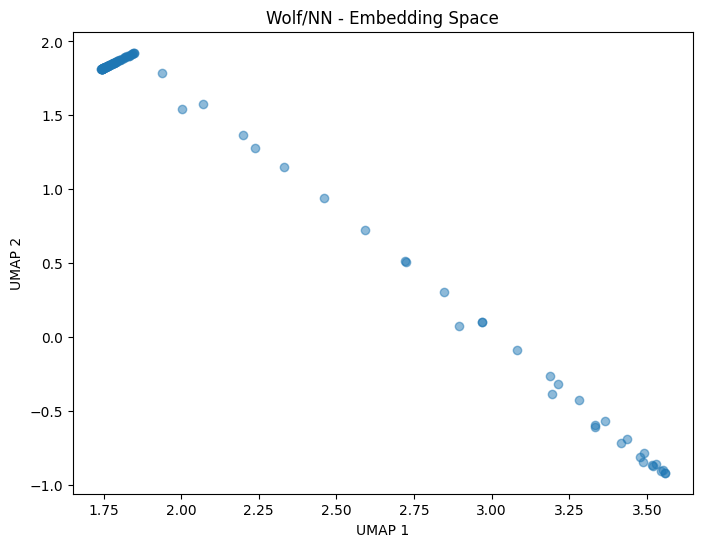

In [23]:
runner = ModelRunnerNN.makeFromSBML(utils.getLocalURL(url=WOLF_URL), num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Wolf/NN")

## Schokker

epochs (rmse=2.8450): 100%|█████████████████| 1000/1000 [04:46<00:00,  3.49it/s]


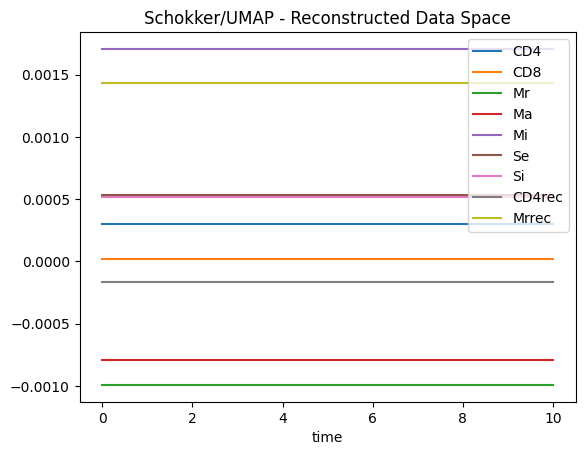

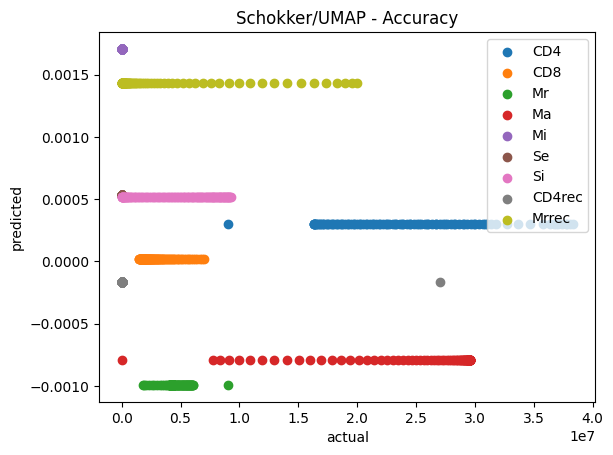

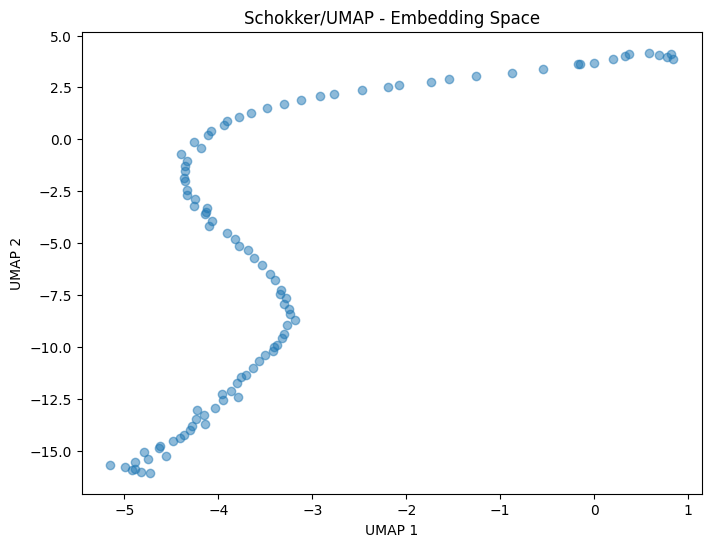

In [7]:
runner = ModelRunnerUMAP.makeFromSBML(utils.getLocalURL(model_num=SCHOKKER_MODEL_NUM), num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Schokker/UMAP")

epochs (accuracy/loss=0.02/12099843621716590067762331648.0000): 100%|█| 1000/100


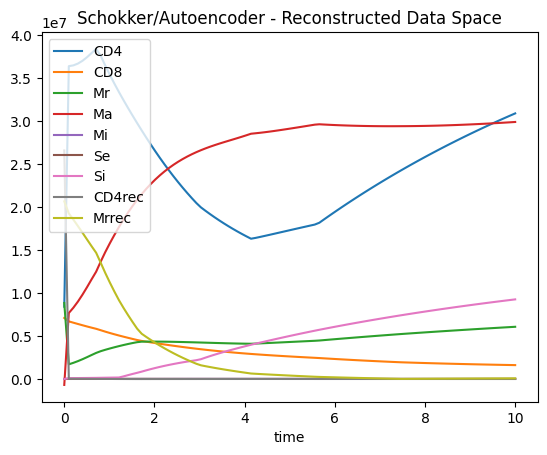

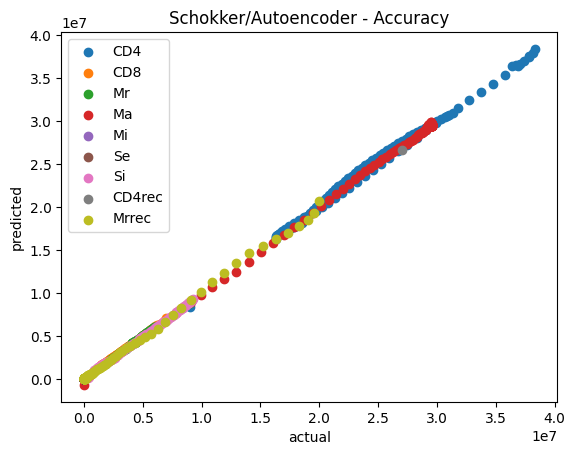

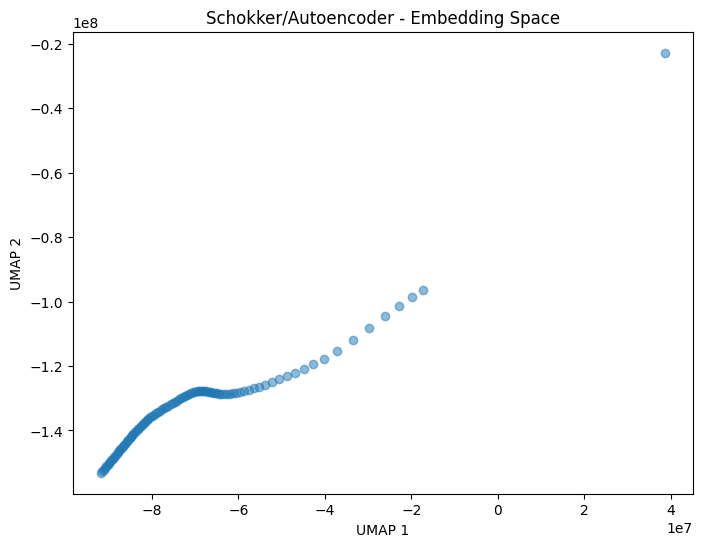

In [8]:
runner = ModelRunnerNN.makeFromSBML(utils.getLocalURL(model_num=SCHOKKER_MODEL_NUM), num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Schokker/Autoencoder")

## Twenty step model

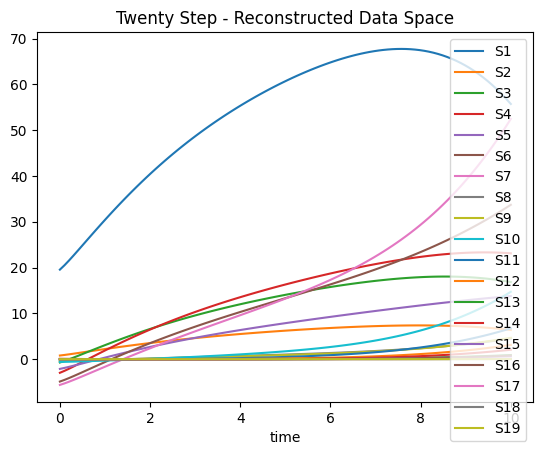

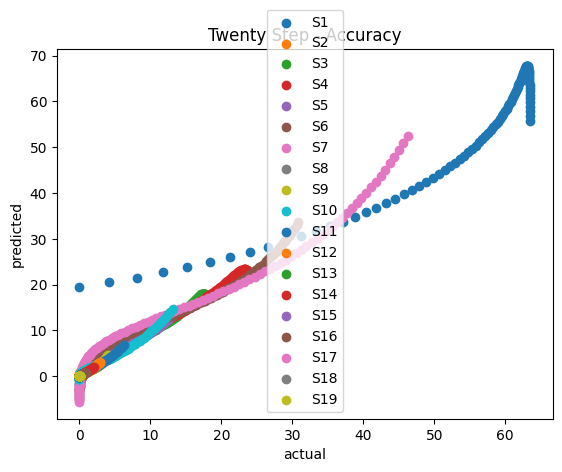

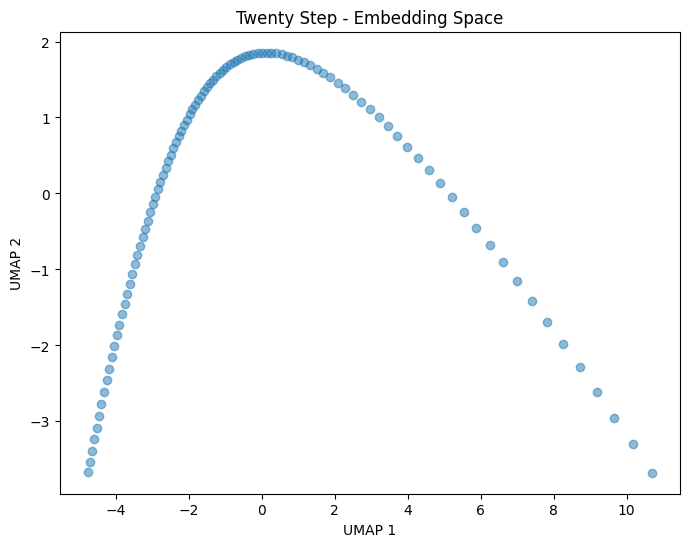

In [10]:
runner = ModelRunnerPCA.makeFromSBML(TWENTY_STEP_MODEL, num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Twenty Step", is_plot_original=False)

epochs (accuracy/loss=0.26/157467921587867043758080.0000): 100%|█| 1000/1000 [10


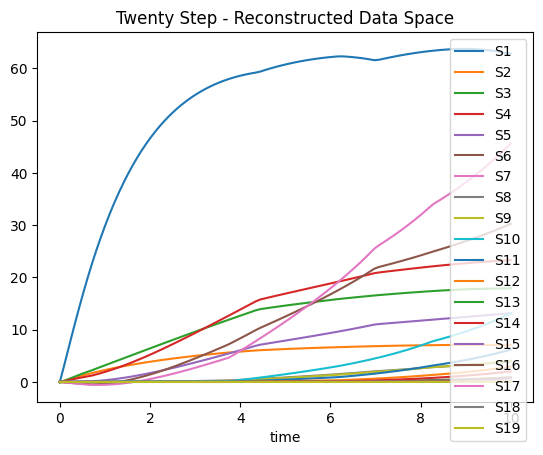

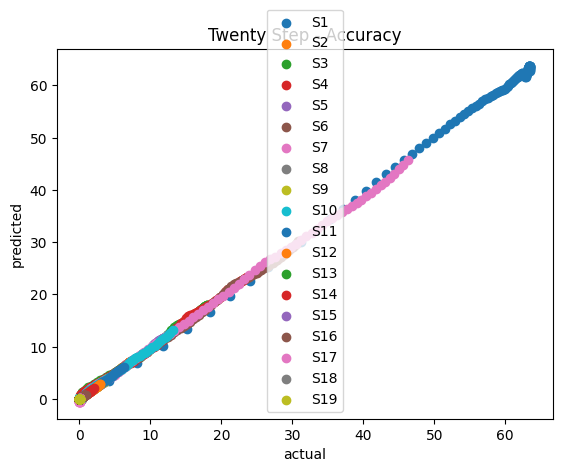

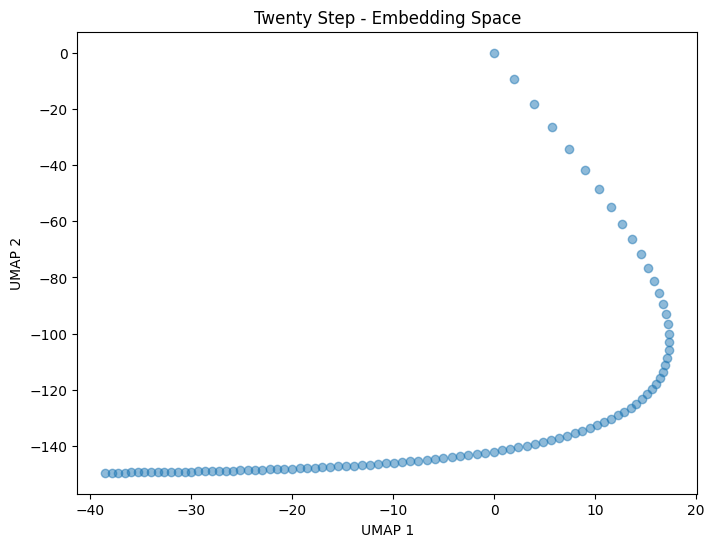

In [11]:
runner = ModelRunnerNN.makeFromSBML(TWENTY_STEP_MODEL, num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Twenty Step")

epochs (rmse=0.3165): 100%|█████████████████| 1000/1000 [04:58<00:00,  3.35it/s]


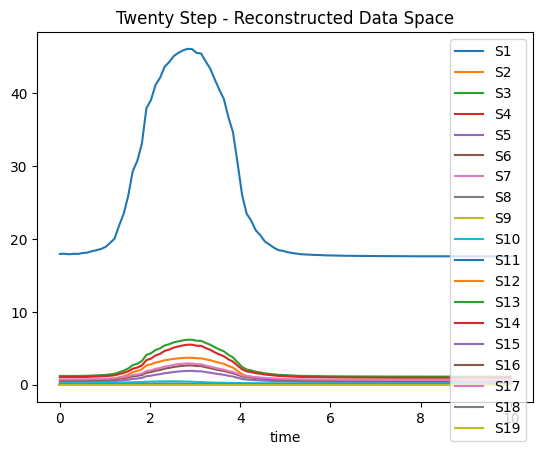

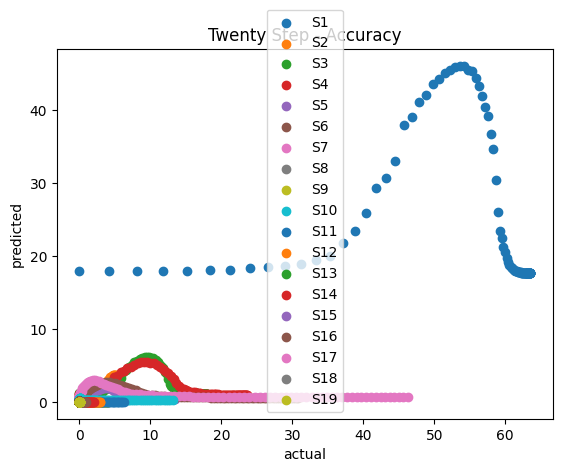

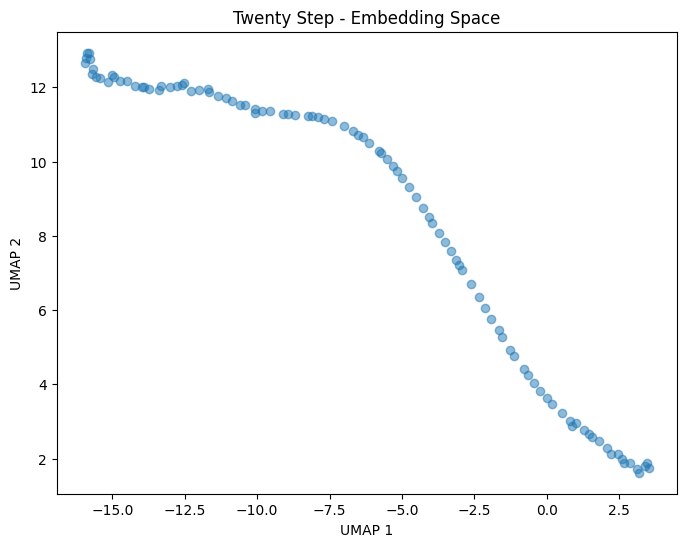

In [12]:
runner = ModelRunnerUMAP.makeFromSBML(TWENTY_STEP_MODEL, num_epoch=NUM_EPOCH)
_ = runner.plotSimulationFit(model_ref="Twenty Step")